**# This is and end-to-end image classification project.**

**# In this project, we will train a CNN to classify images from the CIFAR-10 dataset, a subset of the 80 Million Tiny Images and consists of 60,000 (32 × 32) color images containing 1 of 10 object classes, with 6,000 images per class.**

# ***STEP 1: IMPORT DEPENDENCIES***

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers, optimizers
import numpy as np
from matplotlib import pyplot as plt

# **STEP 2: GET THE DATA READY FOR TRAINING**

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()                    # load preshuffled train and test data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]
print('x_train =', x_train.shape)
print('x_valid =', x_valid.shape)
print('x_test =', x_test.shape)

x_train = (45000, 32, 32, 3)
x_valid = (5000, 32, 32, 3)
x_test = (10000, 32, 32, 3)


# **Normalize the data**

In [10]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_valid = (x_valid-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

# **One-hot encode the labels**

In [11]:
num_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train, num_classes)
y_valid = np_utils.to_categorical(y_valid, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# **Data augmentation**

In [12]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)

datagen.fit(x_train)

# **STEP 3: BUILD THE MODEL ARCHITECTURE**

In [13]:
base_hidden_units = 32
weight_decay = 1e-4
model = Sequential([
                    Conv2D(input_shape = x_train.shape[1:], filters = base_hidden_units, kernel_size = 3, padding = 'same', kernel_regularizer = regularizers.l2(weight_decay)),
                    Activation('relu'),
                    BatchNormalization(),
                    Conv2D(filters = base_hidden_units * 2, kernel_size = 3, padding = 'same', kernel_regularizer = regularizers.l2(weight_decay)),
                    Activation('relu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.2),
                    Conv2D(filters = base_hidden_units * 2, kernel_size = 3, padding = 'same', kernel_regularizer = regularizers.l2(weight_decay)),
                    Activation('relu'),
                    BatchNormalization(),
                    Conv2D(filters = base_hidden_units * 2, kernel_size = 3, padding = 'same', kernel_regularizer = regularizers.l2(weight_decay)),
                    Activation('relu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.3),
                    Conv2D(filters = base_hidden_units * 4, kernel_size = 3, padding = 'same', kernel_regularizer = regularizers.l2(weight_decay)),
                    Activation('relu'),
                    BatchNormalization(),
                    Conv2D(filters = base_hidden_units * 4, kernel_size = 3, padding = 'same', kernel_regularizer = regularizers.l2(weight_decay)),
                    Activation('relu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.4),
                    Flatten(),
                    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)       

# **STEP 4: TRAIN THE MODEL**

In [14]:
batch_size = 128
epochs = 200
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
optimizer = optimizers.Adam(lr=0.0001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              callbacks=[checkpointer],
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              epochs=epochs,
                              verbose=2, validation_data=(x_valid, y_valid))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
351/351 - 34s - loss: 2.8343 - accuracy: 0.2739 - val_loss: 2.2957 - val_accuracy: 0.2466

Epoch 00001: val_loss improved from inf to 2.29575, saving model to model.weights.best.hdf5
Epoch 2/200
351/351 - 30s - loss: 2.1012 - accuracy: 0.3661 - val_loss: 1.5333 - val_accuracy: 0.4710

Epoch 00002: val_loss improved from 2.29575 to 1.53334, saving model to model.weights.best.hdf5
Epoch 3/200
351/351 - 30s - loss: 1.8496 - accuracy: 0.4087 - val_loss: 1.5078 - val_accuracy: 0.4778

Epoch 00003: val_loss improved from 1.53334 to 1.50784, saving model to model.weights.best.hdf5
Epoch 4/200
351/351 - 31s - loss: 1.7108 - accuracy: 0.4462 - val_loss: 1.4458 - val_accuracy: 0.5008

Epoch 00004: val_loss improved from 1.50784 to 1.44583, saving model to model.weights.best.hdf5
Epoch 5/200
351/351 - 30s - loss: 1.6028 - accuracy: 0.4788 - val_loss: 1.4337 - val_accuracy: 0.5154

Epoch 00005: val_loss improved from 1.44583 to 1.43368, saving model to model.weights.best.hdf5
Epoch 6/2

# **STEP 5: EVALUATE THE MODEL**

In [15]:
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

79/79 [==============================] - 1s 15ms/step - loss: 0.4937 - accuracy: 0.8631

Test result: 86.310 loss: 0.494


# **Plot learning curves**

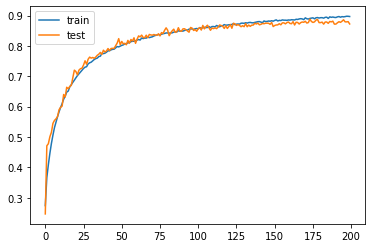

In [19]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()